In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
Min, Max, N = 0.,40.,101
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

In [3]:
def InitT():
    T = np.zeros((N,N))
    T[0,:] = 100
    T[-1,:] = 0
    T[:,0] = 0
    T[:,-1] = 0
    return T

In [4]:
def GetRelaxation(T, omega, Nit = 10000, tolerancia = 1e-2):
    itmax = 0
    for it in tqdm(range(Nit)):
        dmax = 0.
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                r = omega*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
        if np.abs(dmax) < tolerancia:
            itmax = it
            break
    return T,itmax

In [5]:
omega= np.linspace(0.1,1.9,10)
valores_iterativos=[]
for w in omega:
    T = InitT()
    Tf1,it =  GetRelaxation(T,w)
    valores_iterativos.append(it)

  2%|▊                                      | 201/10000 [00:03<03:12, 50.98it/s]


<IPython.core.display.Javascript object>


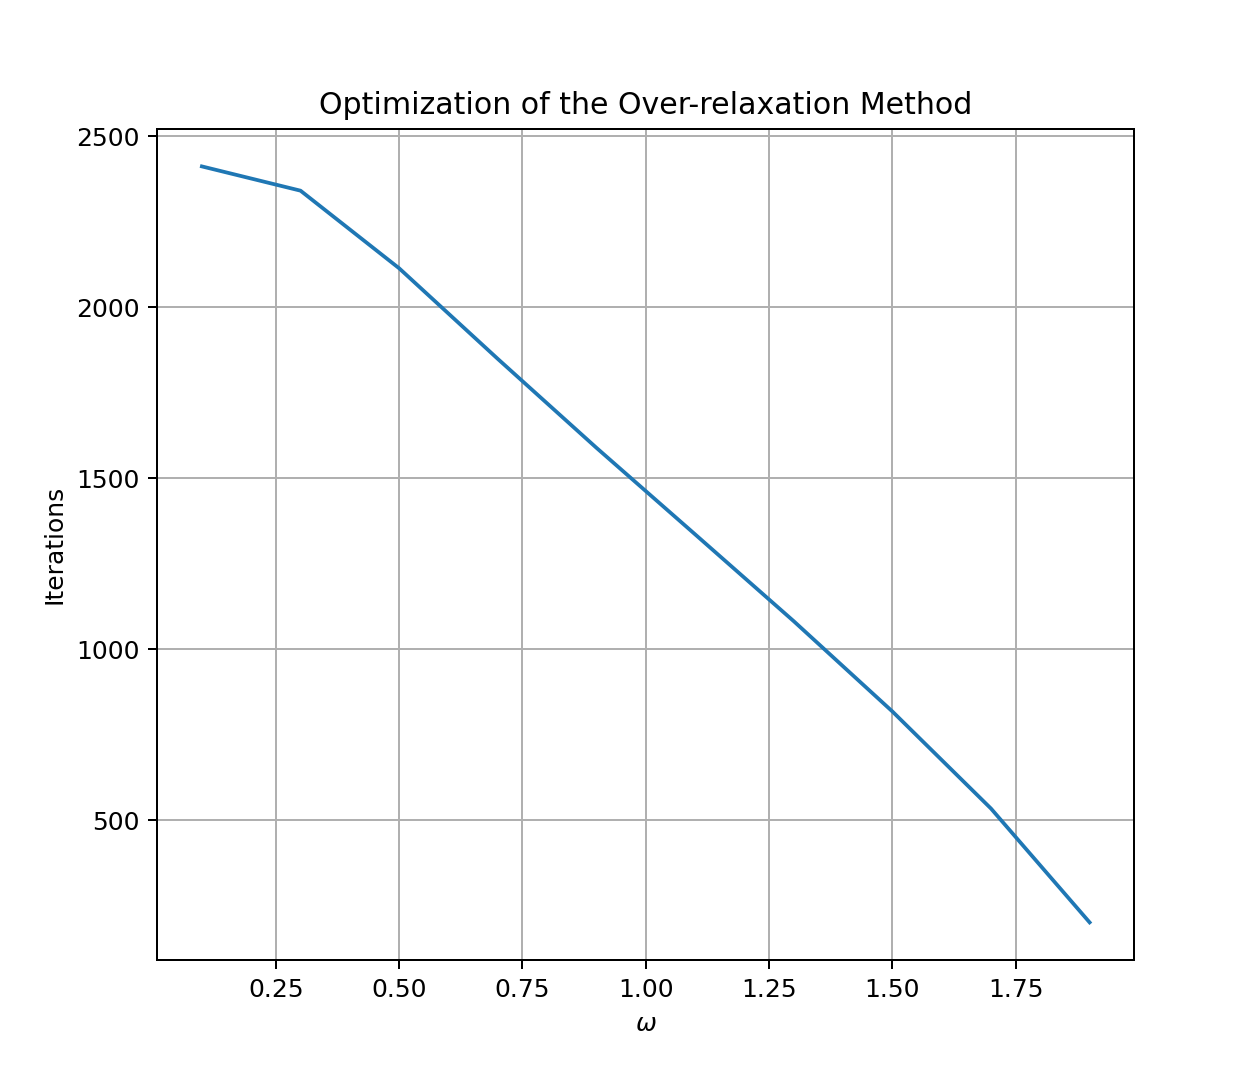

Text(0, 0.5, 'Iterations')

In [6]:
fig= plt.figure(figsize=(7,6))
plt.plot(omega, valores_iterativos)
plt.grid()
plt.title("Optimization of the Over-relaxation Method")
plt.xlabel("$\omega$")
plt.ylabel("Iterations")